Assignment 3
Descriptive Statistics - Measures of Central Tendency and variability
Perform the following operations on any open source dataset (e.g., data.csv)

Provide summary statistics (mean, median, minimum, maximum, standard deviation) for a dataset (age, income etc.) with numeric variables grouped by one of the qualitative (categorical) variable. For example, if your categorical variable is age groups and quantitative variable is income, then provide summary statistics of income grouped by the age groups. Create a list that contains a numeric value for each response to the categorical variable.
Write a Python program to display some basic statistical details like percentile, mean, standard deviation etc. of the species of ‘Iris-setosa’, ‘Iris-versicolor’ and ‘Iris- versicolor’ of iris.csv dataset. Provide the codes with outputs and explain everything that you do in this step.

In [57]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [58]:
df = pd.read_csv("nba.csv")
df.head()

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0.0,PG,25.0,6-2,180.0,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99.0,SF,25.0,6-6,235.0,Marquette,6796117.0
2,John Holland,Boston Celtics,30.0,SG,27.0,6-5,205.0,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28.0,SG,22.0,6-5,185.0,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8.0,PF,29.0,6-10,231.0,NaN,5000000.0


In [59]:
df.isnull().sum()

Name         1
Team         1
Number       1
Position     1
Age          1
Height       1
Weight       1
College     85
Salary      12
dtype: int64

In [60]:
df["College"] = df["College"].fillna("Empty")

In [61]:
df["Salary"].fillna(df["Salary"].mean(), inplace=True)

/var/folders/68/ydmkxvr94fb7j3h7g_g7rr4c0000gn/T/ipykernel_98763/2346652894.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Salary"].fillna(df["Salary"].mean(), inplace=True)


In [62]:
df.dropna(inplace = True)

In [63]:
df.head()

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0.0,PG,25.0,6-2,180.0,Texas,7.730337e+06
1,Jae Crowder,Boston Celtics,99.0,SF,25.0,6-6,235.0,Marquette,6.796117e+06
2,John Holland,Boston Celtics,30.0,SG,27.0,6-5,205.0,Boston University,4.842684e+06
3,R.J. Hunter,Boston Celtics,28.0,SG,22.0,6-5,185.0,Georgia State,1.148640e+06
4,Jonas Jerebko,Boston Celtics,8.0,PF,29.0,6-10,231.0,Empty,5.000000e+06


<Axes: xlabel='Weight', ylabel='Count'>

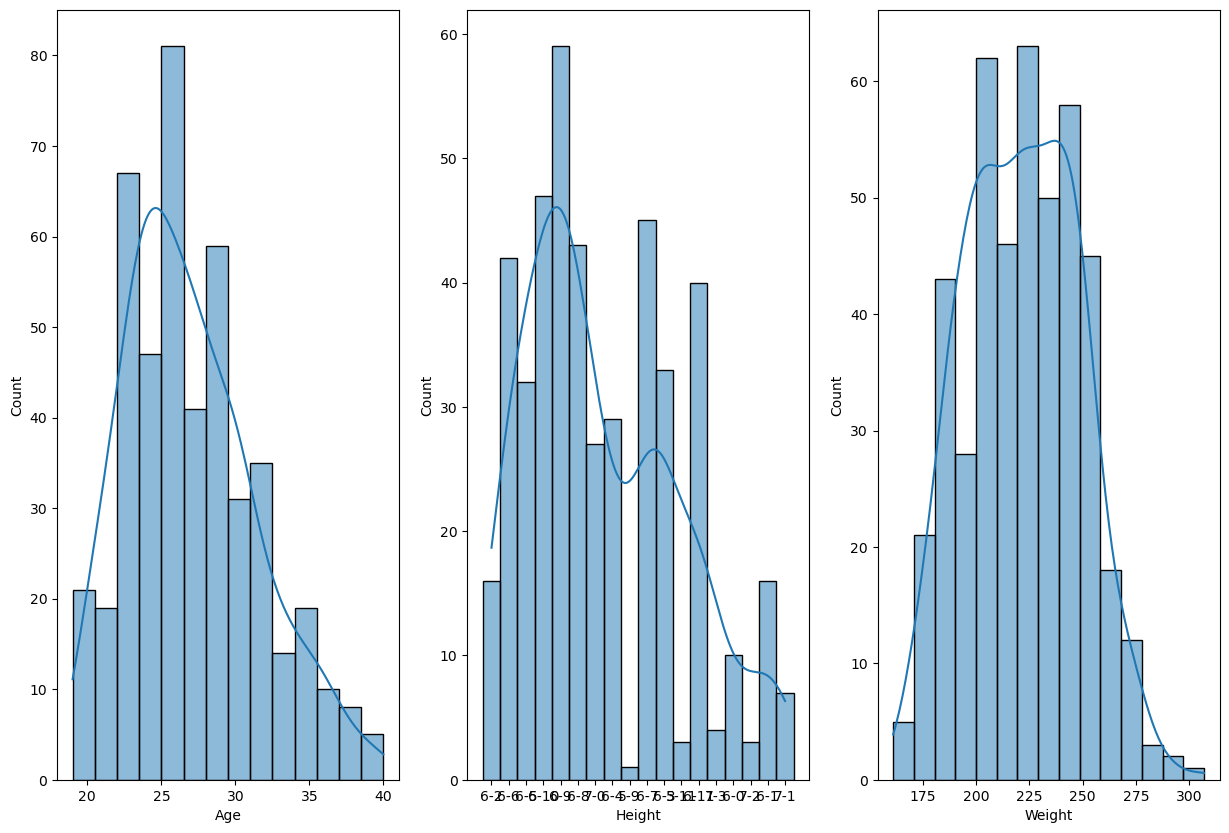

In [64]:
fig , axes = plt.subplots(1 , 3 , figsize = (15 , 10))
sns.histplot(df["Age"] , ax = axes[0] , kde = True)
sns.histplot(df["Height"] , ax = axes[1] , kde = True)
sns.histplot(df["Weight"] , ax = axes[2] , kde = True)

<Axes: ylabel='Salary'>

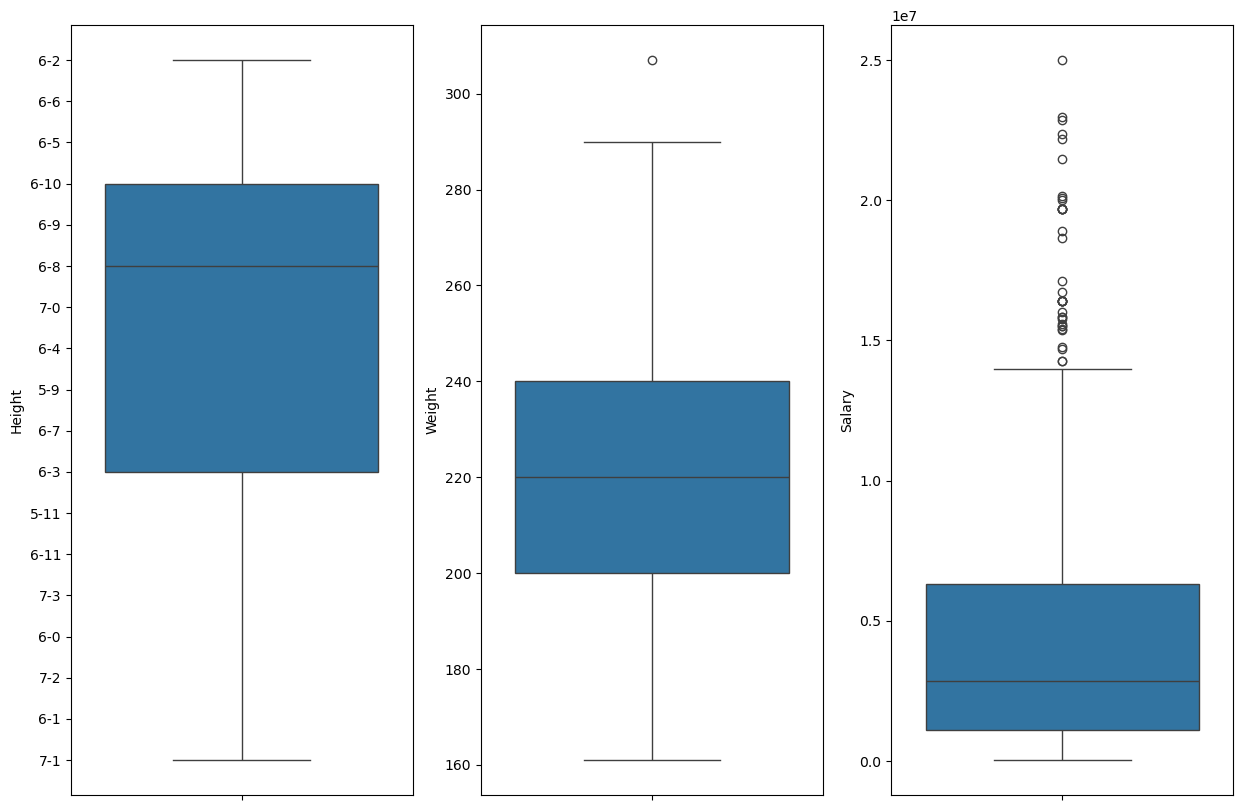

In [65]:
fig , axes = plt.subplots(1 , 3 , figsize = (15 , 10))
sns.boxplot(data = df , ax = axes[0] , y = "Height")
sns.boxplot(data = df , ax = axes[1] , y = "Weight")
sns.boxplot(data = df , ax = axes[2] , y = "Salary")

In [66]:
df.dtypes

Name         object
Team         object
Number      float64
Position     object
Age         float64
Height       object
Weight      float64
College      object
Salary      float64
dtype: object

In [67]:
df["Height"] = df["Height"].astype("string")


In [73]:
def convert_height(df):
    df["Height"] = df["Height"].astype("string")  # Ensure the column is treated as strings
    df["Height"] = df["Height"].str.split("-")  # Split the height into feet and inches
    feet = df["Height"].str[0].astype(int)  # Extract feet and convert to integer
    inches = df["Height"].str[1].astype(int)  # Extract inches and convert to integer
    df["Height"] = feet * 12 + inches  # Convert height to total inches
    return df

df = convert_height(df)

In [74]:
df.head()

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0.0,PG,25.0,74,180.0,Texas,7.730337e+06
1,Jae Crowder,Boston Celtics,99.0,SF,25.0,78,235.0,Marquette,6.796117e+06
2,John Holland,Boston Celtics,30.0,SG,27.0,77,205.0,Boston University,4.842684e+06
3,R.J. Hunter,Boston Celtics,28.0,SG,22.0,77,185.0,Georgia State,1.148640e+06
4,Jonas Jerebko,Boston Celtics,8.0,PF,29.0,82,231.0,Empty,5.000000e+06


In [75]:
df.dtypes

Name         object
Team         object
Number      float64
Position     object
Age         float64
Height        int64
Weight      float64
College      object
Salary      float64
dtype: object

In [85]:
def IQR_outlier(df , feature):
    q1 = np.percentile(df[feature] , 25)
    q3 = np.percentile(df[feature] , 75)

    iqr = q3 - q1

    lower_bound = q1 - 1.0 * iqr
    upper_bound = q3 + 1.0 * iqr

    df = df[(df[feature] >= lower_bound) & (df[feature] <= upper_bound)]
    return df

df = IQR_outlier(df , "Height")
df = IQR_outlier(df , "Weight")
df = IQR_outlier(df , "Salary")
df.head()

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0.0,PG,25.0,74,180.0,Texas,7.730337e+06
1,Jae Crowder,Boston Celtics,99.0,SF,25.0,78,235.0,Marquette,6.796117e+06
2,John Holland,Boston Celtics,30.0,SG,27.0,77,205.0,Boston University,4.842684e+06
3,R.J. Hunter,Boston Celtics,28.0,SG,22.0,77,185.0,Georgia State,1.148640e+06
4,Jonas Jerebko,Boston Celtics,8.0,PF,29.0,82,231.0,Empty,5.000000e+06


In [77]:
df.dtypes

Name         object
Team         object
Number      float64
Position     object
Age         float64
Height        int64
Weight      float64
College      object
Salary      float64
dtype: object

<Axes: ylabel='Salary'>

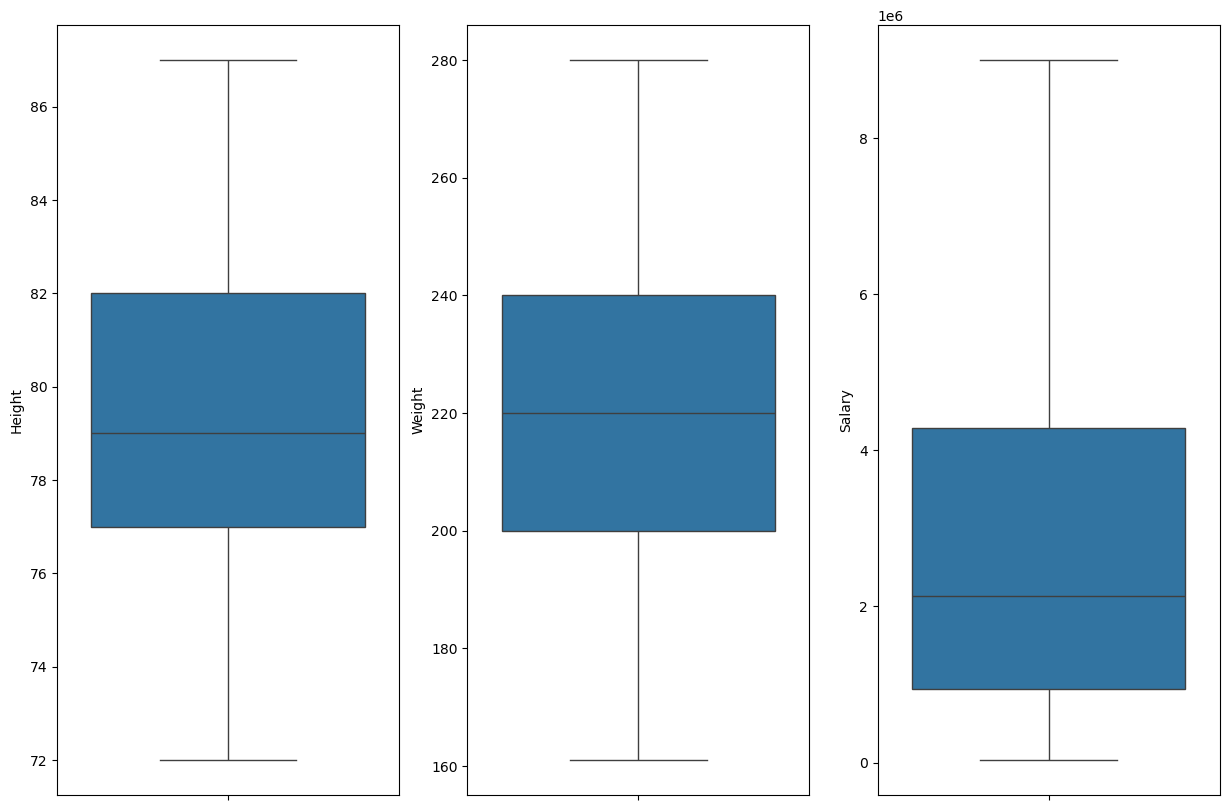

In [86]:
fig , axes = plt.subplots(1 , 3 , figsize = (15 , 10))
sns.boxplot(data = df , ax = axes[0] , y = "Height")
sns.boxplot(data = df , ax = axes[1] , y = "Weight")
sns.boxplot(data = df , ax = axes[2] , y = "Salary")

In [89]:
height_group = df.groupby(df["Height"])

In [90]:
height_group.head()

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0.0,PG,25.0,74,180.0,Texas,7.730337e+06
1,Jae Crowder,Boston Celtics,99.0,SF,25.0,78,235.0,Marquette,6.796117e+06
2,John Holland,Boston Celtics,30.0,SG,27.0,77,205.0,Boston University,4.842684e+06
3,R.J. Hunter,Boston Celtics,28.0,SG,22.0,77,185.0,Georgia State,1.148640e+06
4,Jonas Jerebko,Boston Celtics,8.0,PF,29.0,82,231.0,Empty,5.000000e+06
...,...,...,...,...,...,...,...,...,...
322,Walter Tavares,Atlanta Hawks,22.0,C,24.0,87,260.0,Empty,1.000000e+06
329,Spencer Hawes,Charlotte Hornets,0.0,PF,28.0,85,245.0,Washington,6.110034e+06
435,Meyers Leonard,Portland Trail Blazers,11.0,PF,24.0,85,245.0,Illinois,3.075880e+06
447,Rudy Gobert,Utah Jazz,27.0,C,23.0,85,245.0,Empty,1.175880e+06


In [91]:
height_group.value_counts()

Height  Name                Team                  Number  Position  Age   Weight  College       Salary   
72      Aaron Brooks        Chicago Bulls         0.0     PG        31.0  161.0   Oregon        2250000.0    1
        D.J. Augustin       Denver Nuggets        12.0    PG        28.0  183.0   Texas         3000000.0    1
        Darren Collison     Sacramento Kings      7.0     PG        28.0  175.0   UCLA          5013559.0    1
        Isaiah Canaan       Philadelphia 76ers    0.0     PG        25.0  201.0   Murray State  947276.0     1
        Ish Smith           Philadelphia 76ers    1.0     PG        27.0  175.0   Wake Forest   947276.0     1
                                                                                                            ..
86      Alexis Ajinca       New Orleans Pelicans  42.0    C         28.0  248.0   Empty         4389607.0    1
        Salah Mejri         Dallas Mavericks      50.0    C         29.0  245.0   Empty         525093.0     1
87    

In [92]:
height_group["Salary"].describe()

,count,mean,std,min,25%,50%,75%,max
Height,,,,,,,,
72,8.0,3.046507e+06,1.550819e+06,947276.0,1924319.0,3289473.5,4.303750e+06,5013559.0
73,12.0,3.241523e+06,2.639695e+06,700902.0,1195830.0,2379120.0,4.584356e+06,8344497.0
74,15.0,2.862862e+06,2.576949e+06,525093.0,947276.0,1282080.0,4.842684e+06,8000000.0
75,25.0,3.000291e+06,2.402265e+06,189455.0,947276.0,2170465.0,4.842684e+06,8000000.0
76,24.0,2.503218e+06,1.970609e+06,134215.0,972830.0,1864626.0,3.209010e+06,7085000.0
77,30.0,3.612440e+06,2.834493e+06,55722.0,1159800.0,3068298.0,5.689756e+06,9000000.0
78,37.0,2.263179e+06,1.834616e+06,167406.0,947276.0,1449000.0,3.533333e+06,6796117.0
79,40.0,2.126780e+06,1.729011e+06,30888.0,947276.0,1347180.0,3.392895e+06,6331404.0
80,32.0,2.787226e+06,2.034688e+06,83397.0,947276.0,2615220.0,3.905048e+06,8193030.0


In [93]:
bins = [19 , 25 , 31 , 36 , 40]
labels = ["19-25" , "26-31" , "32-36" , "37-40"]
df["Age_group"] = pd.cut(df["Age"] , bins = bins , labels = labels)
df["Age_group"].head()

0    19-25
1    19-25
2    26-31
3    19-25
4    26-31
Name: Age_group, dtype: category
Categories (4, object): ['19-25' < '26-31' < '32-36' < '37-40']

In [94]:
df["Age_group"].value_counts()

Age_group
19-25    181
26-31    131
32-36     47
37-40     12
Name: count, dtype: int64

In [98]:
age_group = df.groupby(df["Age"])
age_group["Salary"].value_counts()

Age   Salary   
19.0  1733040.0    1
      2127840.0    1
20.0  525093.0     2
      1131960.0    1
      1282080.0    1
                  ..
39.0  947726.0     1
      4088019.0    1
40.0  250750.0     1
      5250000.0    1
      8500000.0    1
Name: count, Length: 324, dtype: int64

In [99]:
age_group["Salary"].describe()

,count,mean,std,min,25%,50%,75%,max
Age,,,,,,,,
19.0,2.0,1.930440e+06,2.791658e+05,1.733040e+06,1.831740e+06,1.930440e+06,2.029140e+06,2127840.0
20.0,19.0,2.725791e+06,1.510913e+06,5.250930e+05,1.636920e+06,2.481720e+06,3.954720e+06,5703600.0
21.0,19.0,2.067380e+06,1.412350e+06,5.250930e+05,1.235480e+06,1.584480e+06,2.084940e+06,5758680.0
22.0,26.0,2.357963e+06,1.517378e+06,5.250930e+05,1.169190e+06,1.793880e+06,3.366733e+06,6331404.0
23.0,39.0,1.834371e+06,1.636306e+06,3.088800e+04,6.375465e+05,1.175880e+06,2.852880e+06,7070730.0
24.0,40.0,2.028447e+06,1.623353e+06,5.250930e+05,8.450590e+05,1.299480e+06,2.536185e+06,7000000.0
25.0,38.0,2.558812e+06,2.557354e+06,1.111960e+05,9.472760e+05,1.153478e+06,3.548771e+06,9000000.0
26.0,22.0,2.393173e+06,2.189713e+06,1.342150e+05,9.557940e+05,1.737220e+06,2.764744e+06,8344497.0
27.0,28.0,2.831466e+06,2.425135e+06,5.572200e+04,9.728300e+05,2.487593e+06,3.696710e+06,8000000.0


In [100]:
df.describe()

,Number,Age,Height,Weight,Salary
count,373.000000,373.000000,373.000000,373.000000,3.730000e+02
mean,18.418231,26.689008,79.184987,220.324397,2.809494e+06
std,16.375529,4.637367,3.284959,25.503202,2.225371e+06
min,0.000000,19.000000,72.000000,161.000000,3.088800e+04
25%,5.000000,23.000000,77.000000,200.000000,9.477260e+05
50%,14.000000,26.000000,79.000000,220.000000,2.139000e+06
75%,28.000000,30.000000,82.000000,240.000000,4.290000e+06
max,99.000000,40.000000,87.000000,280.000000,9.000000e+06
